In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to python environment

In [2]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## 2. Do the necessary pre-processing steps

In [5]:
## missing values of SL and SW are replace using median

In [6]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
for col in ['SL', 'SW','PL']:
    data[col]=data[col].fillna(data[col].median())

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
## here only 3 type of unique values are present.so we can use one hot end coding to convert categorical values type data into numerical

In [11]:
data.shape

(150, 5)

In [12]:
data1=pd.get_dummies(data)

In [13]:
data1.shape

(150, 7)

In [14]:
type(data1)

pandas.core.frame.DataFrame

In [15]:
data1.describe()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667,0.333333,0.333333,0.333333
std,0.808567,0.421995,1.729424,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.275000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [16]:
from sklearn import preprocessing

In [17]:
## spliting into features and target

In [18]:
X=data1.drop('Classification_Iris-setosa',axis=1)
y=data1['Classification_Iris-setosa']

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
data1.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [23]:
data1.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification_Iris-setosa',
       'Classification_Iris-versicolor', 'Classification_Iris-virginica'],
      dtype='object')

In [24]:
data2=data1.drop(['Classification_Iris-versicolor', 'Classification_Iris-virginica'],axis=1)
data2.head()

,SL,SW,PL,PW,Classification_Iris-setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,5.8,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [25]:
X=data1.drop('Classification_Iris-setosa',axis=1)
y=data1['Classification_Iris-setosa']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [27]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
prediction=model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
print('The MSE value is:',mean_squared_error(y_test,prediction))
print('The r squared value is:',r2_score(y_test,prediction))

The MSE value is: 2.3008443068946178e-32
The r squared value is: 1.0


In [30]:
## here mse is very large. so we can use scaling method
## using MinMaxScaling 

In [31]:
data1.describe()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667,0.333333,0.333333,0.333333
std,0.808567,0.421995,1.729424,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.275000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [32]:
X1=X.drop(['Classification_Iris-versicolor', 'Classification_Iris-virginica'],axis=1)

In [33]:
X1.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

In [35]:
X1=min_max_scaler.fit_transform(X1)

In [36]:
type(X1)

numpy.ndarray

In [37]:
X1=pd.DataFrame(X1,columns=['SL', 'SW', 'PL', 'PW'])
X1.head()

,SL,SW,PL,PW
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.416667,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [38]:
X.head()

,SL,SW,PL,PW,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,5.8,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [39]:
X.drop(['SL', 'SW', 'PL', 'PW'],axis=1,inplace=True)

In [40]:
X=pd.concat([X,X1],axis=1)
X.head()

,Classification_Iris-versicolor,Classification_Iris-virginica,SL,SW,PL,PW
0,0,0,0.222222,0.625000,0.067797,0.041667
1,0,0,0.166667,0.416667,0.067797,0.041667
2,0,0,0.416667,0.500000,0.050847,0.041667
3,0,0,0.083333,0.458333,0.084746,0.041667
4,0,0,0.194444,0.666667,0.067797,0.041667


In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [42]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
prediction=model.predict(X_test)

In [43]:
print('The MSE value is:',mean_squared_error(y_test,prediction))
print('The r squared value is:',r2_score(y_test,prediction))

The MSE value is: 2.3172789090867223e-31
The r squared value is: 1.0


In [44]:
## here scaling dosent give any changes in mse
## whwn using normalization

In [45]:
X1=preprocessing.normalize(X1)

In [46]:
type(X1)

numpy.ndarray

In [47]:
X1=pd.DataFrame(X1,columns=['SL', 'SW', 'PL', 'PW'])
X1.head()

,SL,SW,PL,PW
0,0.332625,0.935507,0.101479,0.062367
1,0.365686,0.914215,0.148754,0.091421
2,0.636944,0.764332,0.077729,0.063694
3,0.175319,0.964257,0.178291,0.087660
4,0.278180,0.953758,0.096992,0.059610


In [48]:
X.drop(['SL', 'SW', 'PL', 'PW'],axis=1,inplace=True)

In [49]:
X=pd.concat([X,X1],axis=1)
X.head()

,Classification_Iris-versicolor,Classification_Iris-virginica,SL,SW,PL,PW
0,0,0,0.332625,0.935507,0.101479,0.062367
1,0,0,0.365686,0.914215,0.148754,0.091421
2,0,0,0.636944,0.764332,0.077729,0.063694
3,0,0,0.175319,0.964257,0.178291,0.087660
4,0,0,0.278180,0.953758,0.096992,0.059610


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [51]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The MSE value is:',mean_squared_error(y_test,prediction))
print('The r squared value is:',r2_score(y_test,prediction))

The MSE value is: 2.0666512256571298e-31
The r squared value is: 1.0


In [52]:
## here normalization also dosen't give any change in mse

In [53]:
## when checking outliers 

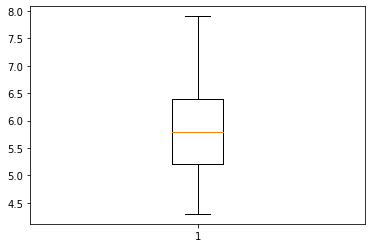

In [54]:
plt.boxplot(data1['SL'])
plt.show()

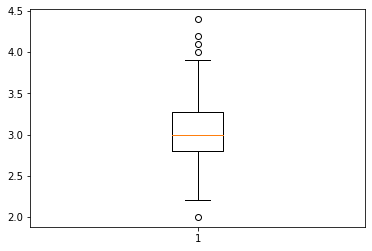

In [55]:
plt.boxplot(data1['SW'])
plt.show()

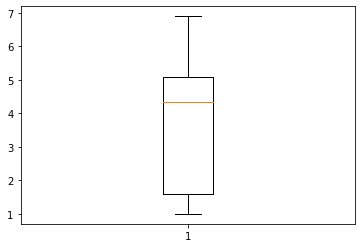

In [56]:
plt.boxplot(data1['PL'])
plt.show()

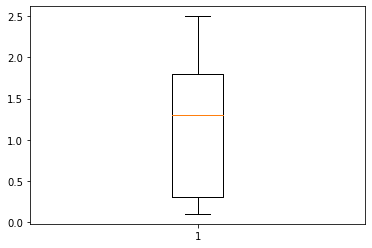

In [57]:
plt.boxplot(data1['PW'])
plt.show()

In [58]:
## here we can sea some outliers are present in SW. so we can handle these outliers

In [59]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')


In [60]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [61]:
data1['SW'].median()

3.0

In [62]:
IQR=Q3-Q1
IQR

0.4500000000000002

In [63]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [64]:
low_lim

2.1249999999999996

In [65]:
up_lim

3.9250000000000003

In [66]:
outliers=[]
for i in data1['SW']:
    if(i>up_lim) or (i<low_lim):
        outliers.append(i)

In [67]:
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [68]:
ind = data1['SW']>up_lim
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [69]:
ind = data1['SW']<low_lim
data.loc[ind].index

Int64Index([60], dtype='int64')

In [70]:
data1.drop([14, 15, 32, 33,60])

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40,0.2,1,0,0
1,4.9,3.0,1.40,0.2,1,0,0
2,5.8,3.2,1.30,0.2,1,0,0
3,4.6,3.1,1.50,0.2,1,0,0
4,5.0,3.6,1.40,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,0,0,1
146,6.3,2.5,5.00,1.9,0,0,1
147,6.5,3.0,4.35,2.0,0,0,1
148,6.2,3.4,5.40,2.3,0,0,1


In [71]:
X1=X.drop(['Classification_Iris-versicolor', 'Classification_Iris-virginica'],axis=1)

In [72]:
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,1))

In [73]:
X1=min_max_scaler.fit_transform(X1)

In [74]:
X1=pd.DataFrame(X1,columns=['SL', 'SW', 'PL', 'PW'])
X1.head()

,SL,SW,PL,PW
0,0.522220,0.936281,0.135512,0.084503
1,0.574126,0.914971,0.198642,0.123870
2,1.000000,0.764965,0.103797,0.086301
3,0.275251,0.965054,0.238085,0.118773
4,0.436741,0.954547,0.129521,0.080767


In [75]:
X.drop(['SL', 'SW', 'PL', 'PW'],axis=1,inplace=True)

In [76]:
X=pd.concat([X,X1],axis=1)
X.head()

,Classification_Iris-versicolor,Classification_Iris-virginica,SL,SW,PL,PW
0,0,0,0.522220,0.936281,0.135512,0.084503
1,0,0,0.574126,0.914971,0.198642,0.123870
2,0,0,1.000000,0.764965,0.103797,0.086301
3,0,0,0.275251,0.965054,0.238085,0.118773
4,0,0,0.436741,0.954547,0.129521,0.080767


## 3. Find out which classification model gives the best result (also do random forest algorithm)

In [77]:
X=data1.drop('Classification_Iris-setosa',axis=1)
y=data1['Classification_Iris-setosa']

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [79]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The r squared value is:',r2_score(y_test,prediction))

The r squared value is: 1.0


In [80]:
## model building using rfe
## rfe with 15 features

In [81]:
from sklearn.feature_selection import RFE

In [82]:
lm = LinearRegression()
rfe_15 = RFE(lm,n_features_to_select= 15)

In [83]:
rfe_15.fit(X_train, y_train)
print(rfe_15.ranking_)

[1 1 1 1 1 1]


In [84]:
prediction = rfe_15.predict(X_test)
print('The r squared value is:',r2_score(y_test,prediction))

The r squared value is: 1.0


In [85]:
## rfe with 15 feature is giving 100% squared

In [86]:
## using knn regression

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)
prediction_knn = knn.predict(X_test)
print('The r squared value is:',r2_score(y_test,prediction_knn))

The r squared value is: 1.0


In [89]:
## using DecisionTreeRegressor

In [90]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=45,max_depth=15)
dt_reg.fit(X_train, y_train)
prediction_dt = dt_reg.predict(X_test)
mse_dt = r2_score(y_test, prediction_dt)
print('{:0.2f}'.format(mse_dt))

1.00


In [91]:
## here all model is giving 100 % r squared value. so the models are good

In [92]:
## doing random forest algorithm

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=300)
rf_reg.fit(X_train, y_train)
prediction_rf = rf_reg.predict(X_test)
mse_rf = r2_score(y_test, prediction_rf)
print('{:0.2f}'.format(mse_rf))

1.00
